<link href="https://fonts.googleapis.com/css?family=IBM+Plex+Mono|IBM+Plex+Sans&display=swap" rel="stylesheet">
<div title="head" style="font-family: 'IBM Plex Mono', monospace; font-size:40px; text-align: right;">2.Discrete Random Variables</div>



---
A __Random Variable__ is a real-valued function of the outcome of the experiment


A __Discrete Random Variable__ can take a finte or countably infinte number of values

A Discrete Random Variable has an associated __Probability Mass Distribution Function (PMF)__

$$p_X(x) = P(\{X=x\})$$

$$p_X(x) = P(X=x)$$

$$\sum_x p_X(x)=1$$

$$P(X\in S) = \sum_{X\in S}p_X(x)$$


---
## The Bernouli Random Variable
---
_Bernouli Random Variable_ takes two values __1__ or __0__

$$ 
X = \begin{cases}
    0, & \text{if a head,}\\
    1, & \text{if a tail.}\\
    \end{cases}
$$

__Its PMF is__
$$
p_X(k) = \begin{cases}
p,  & \text{if k = 1.}\\
1-p,& \text{if k = 0.}\\
\end{cases}
$$

Expected value and Variance,
$$
E[X] = 1.p +0.(1-p) = p \\
E[x^2] = 1^2.p + 0.(1-p) = p \\
var(X) = E[X^2] - (E[X])^2 = p - p^2 = p(1-p)
$$

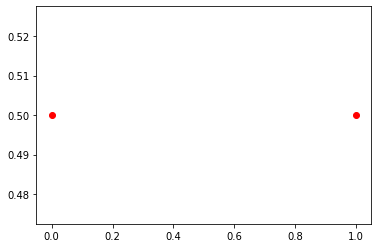


Expected Value E[X]: 0.5  = p
The var(x): 0.25


In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5

x = np.array([0,1])
p_x = np.array([1-p,p])

plt.plot(x,p_x,'ro')
plt.show();

E_x = (x*p_x).sum()

print('\nExpected Value E[X]:',E_x, " = p")


var_x = (((x-E_x)**2)*p_x).sum()
print("The var(x):",var_x)

---
## The Binomial Random Variable 
---
A coin tossed n times, with probability of head is _p_ and tail is _1-p_, and the tosses are _independent_. Let X be heads in n-toss. X is a __binomial random variable__ with parameters __n__ and __p__.
__its PMF is,__

$$
p_X = P(X = k) = {n \choose k} p^k(1-p)^{n-k} \\
\sum_{k=0}^{n} {n \choose k}p^k(1-p)^{n-k} = 1
$$

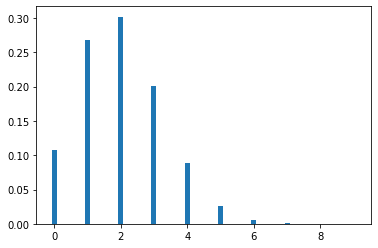


Expected Value E[X]: 1.999998976000001  = np
The var(x): 1.5999934463993715


In [25]:
from scipy.special import comb
n = 10
p = 0.2

k = np.arange(n)
n_a = n*np.ones(n)
p_x = comb(n_a,k)*(p**k)*(1-p)**(n-k)

plt.bar(k,p_x,width=0.15)
plt.show()

E_x = (k*p_x).sum()

print('\nExpected Value E[X]:',E_x," = np")

var_x = ((k-E_x)**2*p_x).sum()
print("The var(x):",var_x)

---
## The Geometric Random Variable 
---
The __geometric random variable__ is the number __X__ of tosses needed for a head to come for the first time.

__its PMF is__
$$
p_X(k) = (1-p)^{k-1}p
$$

    i.e, k-1 succesive tails followed by a head.
Proof of legitimacy,
$$
\sum_{k=1}^\infty p_X(k) = \sum_{k=1}^\infty (1-p)^{k-1}p
= p\sum_{k=0}^{\infty}(1-p)^k = p\frac{1}{1-(1-p)} = 1
$$

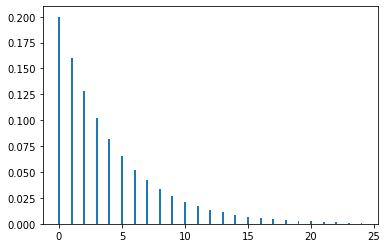


Expected Value E[X]: 3.8904410975974266
The var(x): 17.554521609760403


In [23]:
p = 0.2
k = np.arange(25)
p_x = ((1-p)**k)*p

plt.bar(k,p_x,width=0.15)
plt.show()


E_x = (k*p_x).sum()
print('\nExpected Value E[X]:',E_x)

var_x = ((k - E_x)**2*p_x).sum()

print('The var(x):',var_x)

---
## The Poisson Random Variable 
---
__its PMF is,__ 
$$
p_X(k) = e^{-\lambda}\frac{\lambda^k}{k!}
$$
where $\lambda$ is a positive parameter

Proof of Legitimacy,
$$
\sum_{k=0}^\infty e^{-\lambda}\frac{\lambda^k}{k!} = e^\lambda(1+\lambda+\frac{\lambda^2}{2}+\frac{\lambda^3}{3}+....) = e^{-\lambda}{\lambda} = 1
$$


The __possion__ random variable can be considered as binomial random variable with very small _p_ and very large _n_

      i.e: no of typos in a book, no. of cars involved in an accident

$$
e^{-\lambda}\frac{\lambda}{k!} \approx \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

provided $\lambda = np$


The Expected Value,

$$E[X] = \sum_{k=0}^\infty ke^{-\lambda}\frac{\lambda^k}{k!} \\
= \sum_{k=0}^\infty ke^{-\lambda}\frac{\lambda^k}{k!} \\
= \lambda \sum_{k=1}^\infty e^{-\lambda} \frac{\lambda^{k-1}}{(k-1)!} \\
= \lambda \sum_{m=0}^\infty e^{-\lambda} \frac{\lambda^{m}}{m!} \\
 = \lambda
$$

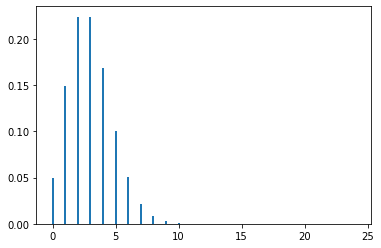

Expected Value E[X]: 2.999999999999923 = \lambda
The var(X): 2.9999999999984954


In [24]:
from scipy.special import factorial
lmbda = 3
k = np.arange(25)

p_x = np.exp(-lmbda)*((lmbda**k)/(factorial(k)))

plt.bar(k,p_x,width=0.15)
plt.show()

E_x = (k*p_x).sum()
print('Expected Value E[X]:',E_x, "= \lambda" )
n = k.size

var_x = ((k-E_x)**2*p_x).sum()
print('The var(X):',var_x)

---
## Function on Random Variables
---

Given a random variable X , one may generate other random variables by applying various transformations on X.
$$Y = g(X)$$

If X is discrete with PMF $p_X$, then Y is also discrete, and its PMF $p_Y$ can be calculated using the PMF of X. In particular, to obtain $ p_Y(y) $ for any $y$ ,we add the probabilities of a values of $x$ such that $g(x)=y$:

$$
p_Y(y)  = \sum_{\lbrace x|g(x)=y \rbrace }p_X(x)
$$

---

## Expectation, Mean, and Variance
---

Expectation $E[X]$ of $X$ is a weighted (in proportion to probability) average of the possible values of X.

$$E[x] = \sum_x xp_X(x)$$

The __Variance__ is given by:

$$var(x) = \sum_x (x-E[x])^2p_X(x) = E[X^2] - (E[X])^2$$


if $Y = aX+b$,
$$
E[Y] = \sum_x (ax + b)p_X(x) = a\sum_x xp_X(x) + b \sum p_X(x) \\
E[Y] = aE[X]+b
$$

Similarly for __variance__,
$$
var(Y)  = \sum_x (ax + b - E[ax+b])^2p_X(x) \\
 = \sum_x (ax+b - aE[x] + b)^2p_X(x)\\
 = a^2\sum_x (x-E[X])^2p_X(x)\\
 = a^2var(x)\\
$$

100.14007500748015


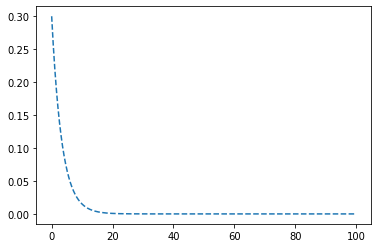

In [31]:
lmbda = 0.3
x = np.linspace(0,100,10000)
f_x = lmbda*(np.exp(-(lmbda*x)))
print(f_x.sum())
plt.plot(x,f_x,'--')